In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from scipy import stats
from CoreBx_funcs import UTM2Island, which_computer, yaml2dict

drv, _ = which_computer()
print(drv)

indir = drv+'crs/proj/2019_DorianOBX/Dorian_paper_analyses/'
outdir = drv+'crs/proj/2019_DorianOBX/Dorian_paper_analyses/figs/'

D:/


### Washout area statistics file from Jin-Si, Aug 10, 2022

In [5]:
df = pd.read_csv(indir+'NCB_postDorian_stats_2022.csv')
df.describe()

,Rowid,Shape_Area,Perimeter_m,MIN_elev,MAX_elev,RANGE_elev,MEAN_elev,STD_elev,Volume_m3,Volume,...,Ch_Type,Convex_Hull_Area,Convex_Hull_perimeter_m,Polygon_area_outside_overwash_m2,%outwash outside of overwash,R1,R2,DI,II,Cr
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,...,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,42.000000,13321.481928,1800.126824,-3.503923,0.227989,3.731912,-1.132873,0.619161,-17772.704886,17772.704886,...,1.795181,20974.742418,477.022081,6409.451807,35.811566,0.080044,0.600548,3.871171,3.203746,0.080108
std,24.103942,16949.082242,1702.569542,1.336743,0.300320,1.511503,0.310491,0.191629,22853.666293,22853.666293,...,0.920750,24247.659837,317.529910,8820.152373,22.269370,0.080152,0.116213,1.404754,1.231472,0.080216
min,1.000000,46.000000,36.527041,-6.462904,-0.150000,0.526728,-1.642211,0.097799,-103087.401800,33.969471,...,1.000000,53.871173,28.741685,0.000000,0.000000,0.011118,0.380423,1.312872,1.217296,0.011127
25%,21.500000,1308.500000,413.588867,-4.561853,0.067500,2.677354,-1.362052,0.503534,-23642.984065,994.893965,...,1.000000,2580.625425,205.174807,133.650000,16.410000,0.033859,0.516250,2.783672,2.042765,0.033886
50%,42.000000,7157.000000,1345.763812,-3.604638,0.142000,3.796475,-1.207729,0.658057,-8423.176529,8423.176529,...,2.000000,13812.626360,459.433534,2870.500000,34.230000,0.050807,0.594129,3.832820,3.219695,0.050848
75%,62.500000,18225.000000,2484.470167,-2.516174,0.292000,4.807853,-0.964854,0.783578,-994.893965,23642.984065,...,2.000000,28888.340255,679.038933,9474.150000,54.345000,0.096353,0.682925,4.695133,4.131492,0.096430
max,83.000000,89088.000000,7401.883409,-0.676728,1.537000,7.747000,-0.439850,0.965698,-33.969471,103087.401800,...,5.000000,107869.518900,1349.089879,34979.900000,80.940000,0.433030,0.858610,8.193454,6.055575,0.433375


In [38]:
df.sum()['Shape_Area']

1105683.0

In [27]:
tapering_DI = df.loc[df['Ch_Type'] == 1]['DI'].values
lobate_DI = df.loc[df['Ch_Type'] == 2]['DI'].values
apron_DI = df.loc[df['Ch_Type'] == 3]['DI'].values
lagoonal_DI = df.loc[df['Ch_Type'] == 4]['DI'].values
barrier_DI = df.loc[df['Ch_Type'] == 5]['DI'].values
all_outwash_plus_DI = df['DI'].values # includes weird ones

In [17]:
all_outwash_DI = np.concatenate((tapering_DI, lobate_DI, apron_DI))
all_outwash_DI.shape

(79,)

In [12]:
u, p = stats.mannwhitneyu(lobate_DI, tapering_DI)
print('Null hypothesis that lobate and tapering distributions are equal can be rejected if p is small.')
print('p = {:f}'.format(p))
u, p = stats.mannwhitneyu(tapering_DI, apron_DI)
print('Null hypothesis that tapering and apron distributions are equal can be rejected if p is small.')
print('p = {:f}'.format(p))
u, p = stats.mannwhitneyu(lobate_DI, tapering_DI)
print('Null hypothesis that lobate and tapering distributions are equal can be rejected if p is small.')
print('p = {:f}'.format(p))

Null hypothesis that lobate and tapering distributions are equal can be rejected if p is small.
p = 0.000017
Null hypothesis that tapering and apron distributions are equal can be rejected if p is small.
p = 0.000173
Null hypothesis that lobate and tapering distributions are equal can be rejected if p is small.
p = 0.000017


### Florence overwash statistics from Jin-Si, Aug. 10, 2022

In [42]:
dbf = pd.read_csv(indir+'NCB_Florence_Stats_2022.csv',header=0)
print('Sum of all overwash: ',dbf.sum()['Shape_Area_m'])
all_overwash_DI = dbf['DI']
u, p = stats.mannwhitneyu(all_outwash_DI, all_overwash_DI)
print('Null hypothesis that outwash and overwash distributions are equal can be rejected if p is small.')
print('p = {:f}'.format(p))
dbf.describe()

Sum of all overwash:  1186405.0337329998
Null hypothesis that outwash and overwash distributions are equal can be rejected if p is small.
p = 0.020497


,Florence Overwash ID,Dorian_binary,Centroid_X,Centroid_Y,Shape_perimeter_m,Shape_Area_m,MBG_Width,MBG_Length,Throat_m,Convex_Hull_perimeter_m,Convex_Hull_Area_m2,R1,R2,DI,II,Cr,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
count,110.000000,110.000000,110.000000,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,0.0,0.0,0.0,0.0
mean,57.981818,0.654545,391194.076944,3.868269e+06,1304.932689,10785.500307,95.361150,219.139335,90.437909,459.433165,17436.862666,0.086627,0.580318,3.488255,2.732557,0.085916,NaN,NaN,NaN,NaN
std,33.144383,0.477693,5922.870365,5.468586e+03,1241.856835,17047.381332,60.072931,417.465687,132.539569,324.560410,25824.509450,0.058596,0.116319,1.403610,1.107355,0.058139,NaN,NaN,NaN,NaN
min,1.000000,0.000000,380207.238900,3.858298e+06,157.808411,145.659988,13.846546,33.205957,3.790000,78.021790,317.196433,0.009000,0.302000,1.518000,0.235165,0.008734,NaN,NaN,NaN,NaN
25%,30.250000,0.000000,387241.651375,3.864413e+06,565.709434,2241.487152,51.000698,103.692877,19.982500,272.868323,4205.239103,0.048250,0.479000,2.609500,2.020381,0.047699,NaN,NaN,NaN,NaN
50%,58.500000,1.000000,391971.087000,3.869080e+06,870.553482,4642.452832,82.615002,138.141847,41.155000,365.504695,8677.818348,0.074000,0.576500,3.172500,2.508441,0.073635,NaN,NaN,NaN,NaN
75%,85.750000,1.000000,395709.800125,3.872446e+06,1599.323767,13860.002540,126.223855,201.507797,107.212500,561.558305,20782.455410,0.109750,0.669000,3.941750,3.347016,0.108836,NaN,NaN,NaN,NaN
max,114.000000,1.000000,400797.350000,3.877069e+06,7443.908608,125550.011300,344.391763,4267.202497,827.330000,1878.855500,162411.852900,0.324000,0.815000,9.211000,6.748773,0.321397,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'DI')

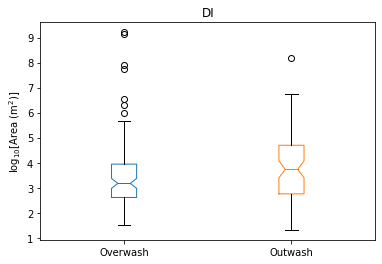

In [26]:
boxfix, ax = plt.subplots(1,1,sharey=True)
bp=ax.boxplot((all_overwash_DI,all_outwash_DI),notch=True)
plt.setp(bp['boxes'][0], color='tab:blue')
plt.setp(bp['medians'][0], color='tab:blue')

plt.setp(bp['boxes'][1], color='tab:orange')
plt.setp(bp['medians'][1], color='tab:orange')

ax.set_xticklabels(('Overwash','Outwash'))
ax.set_ylabel('log$_{10}$[Area (m$^2$)]')
plt.title("DI")
#plt.savefig(outdir+'box_'+figname,dpi=200)

In [37]:
u, p = stats.mannwhitneyu(all_outwash_plus_DI, all_overwash_DI)
print('Null hypothesis that outwash and overwash distributions are equal can be rejected if p is small.')
print('p = {:f}'.format(p))
print('Overwash median, mean, std: {:.3f} {:.3f} {:.3f}'.format(np.median(all_overwash_DI), np.mean(all_overwash_DI), np.std(all_overwash_DI)))
print('Outwash  median, mean, std: {:.3f} {:.3f} {:.3f}'.format( np.median(all_outwash_DI), np.mean(all_outwash_DI), np.std(all_outwash_DI)))

Null hypothesis that outwash and overwash distributions are equal can be rejected if p is small.
p = 0.011280
Overwash median, mean, std: 3.172 3.488 1.397
Outwash  median, mean, std: 3.734 3.851 1.416


Text(0.5, 1.0, 'DI')

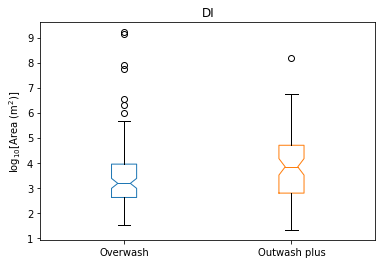

In [30]:
boxfix, ax = plt.subplots(1,1,sharey=True)
bp=ax.boxplot((all_overwash_DI,all_outwash_plus_DI),notch=True)
plt.setp(bp['boxes'][0], color='tab:blue')
plt.setp(bp['medians'][0], color='tab:blue')

plt.setp(bp['boxes'][1], color='tab:orange')
plt.setp(bp['medians'][1], color='tab:orange')

ax.set_xticklabels(('Overwash','Outwash plus'))
ax.set_ylabel('log$_{10}$[Area (m$^2$)]')
plt.title("DI")
#plt.savefig(outdir+'box_'+figname,dpi=200)